<h2 dir ="rtl">
    بارگذاری و نمایش سیگنال
</h2>

---
<div dir = "rtl">
    <ul>
        <li>
        <a href = "https://librosa.org/doc/latest/index.html">librosa</a> برای پردازش سیگنال صوت استفاده می‌شود  ‍‍ 
        </li>
        <li>
           <a href = "https://matplotlib.org/">matplotlib</a> برای رسم نمودار‌ها استفاده می‌شود 
        </li>
        <li>
            IPython.display می‌تواند برای گوش دادن به صوت در داخل محیط نوت‌بوک استفاده شود    
        </li>
        
   </ul>
</div>

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
audio_path = "Audio/speech.wav"
ipd.Audio(audio_path)

In [3]:
samples, sr = librosa.load(audio_path, duration=6)
samples.size

132300

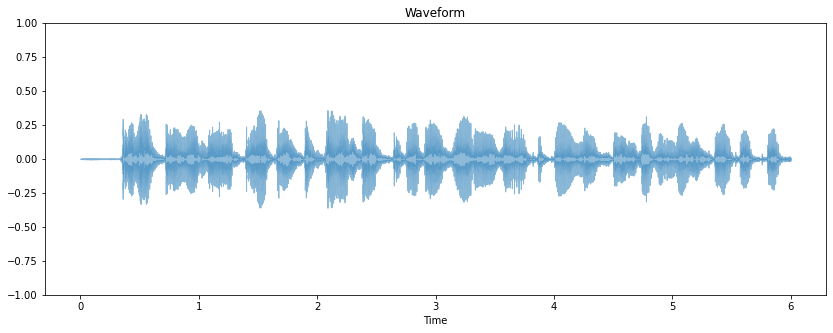

In [4]:
plt.figure(figsize = (14, 5))
librosa.display.waveshow(samples, sr=sr, alpha = 0.5)
plt.title("Waveform")
plt.ylim((-1, 1))
plt.show()

### Center Clipping

<div dir = "rtl">
    در تابع زیر مقدار ماکسیمم مطلق در ۱/۳ اول و آخر فریم محاسبه می‌گردد و سپس ۷۰٪ مینیمم این دو به عنوان سطح برش محاسبه می‌گردد (Clipping Level). سپس با استفاده از تابع زیر مقادیر جدید محاسبه می‌گردند:
    
</div>
    <div dir = "ltr">

<img src= "images/center-clipping.jpeg"><img>

</div>

<div dir = "rtl">
     <code>()get_clipping_level</code> برای محاسبه سطوح برش در هر فریم.
</div>

<div dir = "rtl">
     <code>()center_clip</code> برای تغییر مقادیر نمونه‌ها بر اساس سطوح برش محاسبه شده.
</div>

In [5]:
FRAME_LENGTH = 512

In [6]:
def get_clipping_level(signal, frame_length = FRAME_LENGTH):
    clip_levels = []
    three_fold = int(np.ceil(frame_length/3.))
    
    for i in range(0, len(signal), frame_length):
    
        if i+frame_length > len(signal):
            frame_length = len(signal)-i+1
            three_fold = int(np.ceil(frame_length/3.))
        
        begin = max(abs(signal[i:i+three_fold]))
        end = max(abs(signal[i+frame_length-three_fold: i+ frame_length]))
        choice = min(begin, end)
        
        final_clip = 0.7*choice
        
        clip_levels.append(final_clip)
    
    return np.array(clip_levels)

In [7]:
clip_levels = get_clipping_level(samples)

# Check if we have a clipping value for each frame
assert len(clip_levels) == int(np.ceil(samples.size/FRAME_LENGTH))

In [8]:
def center_clip(signal, clipping_levels, frame_length = FRAME_LENGTH):

    for frame, i in enumerate(range(0, len(signal), frame_length)):
        for j in range(i, min(i+frame_length, signal.size)):
            
            if -clipping_levels[frame]<=signal[j]<= clipping_levels[frame]:
                signal[j] = 0
            elif signal[j]> clip_levels[frame]:
                signal[j] -= clip_levels[frame]
            elif signal[j] < -clipping_levels[frame]:
                signal[j] += clip_levels[frame] 
            
    return signal

In [9]:
clipped_samples = center_clip(samples.copy(), clip_levels)
assert clipped_samples.size == samples.size

<h3 dir ="rtl">
    مقایسه سیگنال قبل و بعد از center clipping:
</h3>

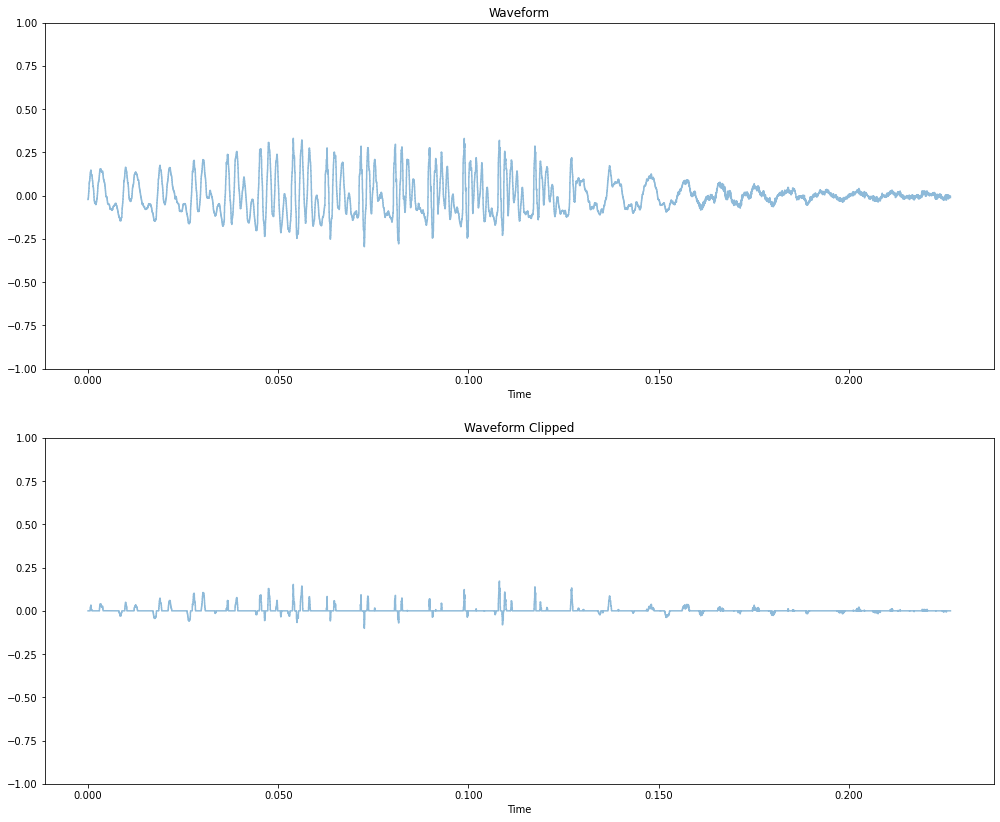

In [10]:
plt.figure(figsize = (17, 14))
plt.subplot(2, 1, 1)
librosa.display.waveshow(samples[10000:15000], sr=sr, alpha = 0.5)
plt.title("Waveform")
plt.ylim((-1, 1))

plt.subplot(2, 1, 2)
librosa.display.waveshow(clipped_samples[10000:15000], sr=sr, alpha = 0.5)
plt.title("Waveform Clipped")
plt.ylim((-1, 1))

plt.show()

### Autocorrelation

<div dir ="rtl">
    استخراج اتوکورولیشن برای هر دو سیگنال. اتوکورولیشن با lag یا شیفت ۰ تا ۵۰۰۰ محاسبه گردیده و نمودار هر دو سیگنال رسم گردیده است.
</div>

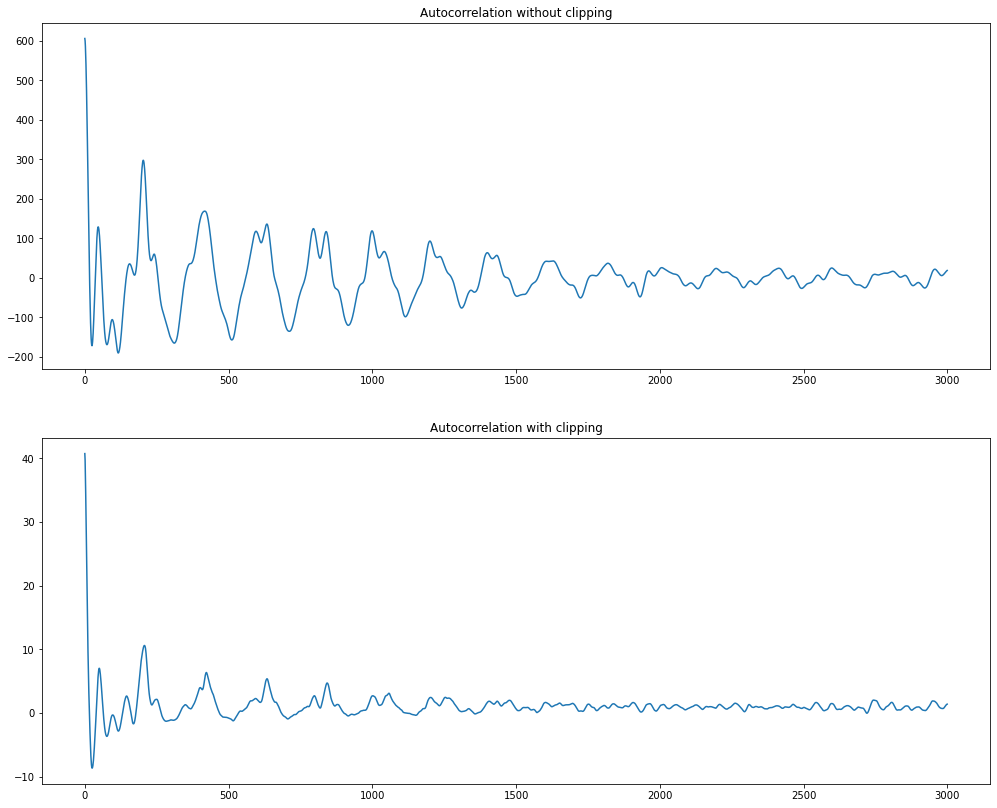

In [11]:
r = librosa.autocorrelate(samples, max_size=5000)
r_clipped = librosa.autocorrelate(clipped_samples, max_size=5000)


plt.figure(figsize = (17, 14))
plt.subplot(2, 1, 1)
plt.plot(r[:3000])
plt.title("Autocorrelation without clipping")

plt.subplot(2, 1, 2)
plt.plot(r_clipped[:3000])
plt.title("Autocorrelation with clipping")

plt.show()


<div dir="rtl">
      مقدار η!=0 که بیشترین مقدار را دارد محاسبه گردیده و با استفاده از فرمول زیر فرکانس گام محاسبه گردیده است:   
</div>

$f_{pitch} = \frac{f_{s}}{\eta}$

In [12]:
# For clipped signal

eta = None
peak = None

for i in range(1, len(r_clipped)):
    if r_clipped[i]>r_clipped[i-1]:
        if peak is None or peak<r_clipped[i]:
            peak = r_clipped[i]
            eta = i
            
f_pitch = sr/eta

In [13]:
print(f"Pitch frequency : {f_pitch}")

Pitch frequency : 106.52173913043478
